### Data Wrangling Assignment – 3 (150 Points)
In this assignment we will use basic ideas of Set Theory to wrangle a clinical dataset using a
programming language of your choice. Submit your code and datasets using your GitHub repository.
Here is a quick refresher to Set Theory: htps://www.geeksforgeeks.org/set-theory/. These concepts are
used to deﬁne inclusion and exclusion criteria of cohorts and in creation of their corresponding datasets
(htps://pubmed.ncbi.nlm.nih.gov/24026307/).
COVID-19 has been associated with the occurrence new diabetes and hyperglycemia
(htps://academic.oup.com/jamiaopen/article/4/3/ooab063/6320067). In this exercise you will use a
synthetic diagnosis ﬁle containing patient IDs, ICD 10 diagnosis codes, and a date of diagnosis. You will
need to use the following code sets for your wrangling steps:

##### • Diabetes Codes

ICD 10 Code   Concept

E08           Diabetes mellitus due to underlying condition

E09           Drug or chemical induced diabetes mellitus

E10           Type 1 diabetes mellitus

E11           Type 2 diabetes mellitus

E13           Other specified diabetes mellitus



##### • COVID Codes

ICD 10 Code   Concept

U07.1         COVID-19

J12.82        Pneumonia due to COVID-19

##### Questions:
1. Diabetes Set: (20 Points)

    a. Find all patients with Diabetes using the codes above by listing their patient IDs.
    
    b. Find the cardinality of the Diabetes set.

In [2]:
# from pyspark.sql import SparkSession
from pyspark.sql.types import StructType, StructField, IntegerType, StringType, DateType 
from pyspark.sql.functions import col

# Initialize SparkSession
# spark = SparkSession.builder.appName("DataWraglingAssignment4").getOrCreate()

# Read the CSV file
synthetic_diagnosis_file_df = spark.read.csv("DW3_set_exercise.csv", header=True, inferSchema=True)

# Convert the "Patient ID" column from float to integer
synthetic_diagnosis_file_df = synthetic_diagnosis_file_df.withColumn("Patient ID", col("Patient ID").cast("integer"))

synthetic_diagnosis_file_df = synthetic_diagnosis_file_df.select(col("Patient ID"), col("Diagnosis Code"), "Date")
# synthetic_diagnosis_file_df.show()

# Filter for Diabetes codes
diabetes_codes = ["E08", "E09", "E10", "E11", "E13"]
diabetes_df = synthetic_diagnosis_file_df.filter(synthetic_diagnosis_file_df["Diagnosis Code"].isin(diabetes_codes))



# List patient IDs with Diabetes
diabetes_patient_ids = diabetes_df.select("Patient ID").distinct()
diabetes_patient_ids.show(diabetes_patient_ids.count())

+----------+
|Patient ID|
+----------+
|    971897|
|   2320800|
|   7054630|
|   3963817|
|   6031583|
|   6142172|
|   2179713|
|    600660|
|   5478084|
|   4342331|
|   7754092|
|   1374125|
|    758074|
|   4720518|
|    279308|
|   4242583|
|    457297|
|   4287731|
|   1713340|
|   3481402|
|   1527014|
|   7512943|
|   2549091|
|    921112|
|   7576034|
|   3420033|
|   1742818|
|   2954633|
|   2313408|
|   6303725|
|   1976724|
|   3342522|
|    804032|
|   2513111|
|   7004868|
|    345301|
|    608871|
|   3262709|
|   5106140|
|   7043664|
|   1428638|
|   4307464|
|   5131070|
|   2826973|
|   2464564|
|   2408746|
|   1766984|
|   2216188|
|   3446369|
|    712289|
|   6522566|
|   1467882|
|   6326987|
|   1444424|
|   2037849|
|   1209802|
|    513267|
|   6014024|
|   3636206|
|   2409395|
|   5449788|
|   5317809|
|   5471711|
|   6938681|
|   4098228|
|   7753754|
|   5868784|
|   3491393|
|   6863238|
|   5527426|
|   3198785|
|   6803793|
|    601117|
|   6065876|

In [3]:
# Find cardinality of the Diabetes set
cardinality = diabetes_df.distinct().count()
print(f"Cardinality of the Diabetes set: {cardinality}")

Cardinality of the Diabetes set: 5153


#### 2. COVID Set: (20 Points)

    a. Find all patients with COVID using the codes above by listing their patient IDs.
    
    b. Find the cardinality of the COVID set.

In [4]:
# Filter for COVID codes
covid_codes = ["U07.1", "J12.82"]
covid_df = synthetic_diagnosis_file_df.filter(synthetic_diagnosis_file_df["Diagnosis Code"].isin(covid_codes))

# List patient IDs with covid
covid_patient_ids = covid_df.select("Patient ID").distinct()
covid_patient_ids.show(covid_patient_ids.count())



+----------+
|Patient ID|
+----------+
|   6142172|
|   7682004|
|   4837549|
|   5965704|
|    615697|
|   2387512|
|   4803005|
|   4712116|
|   2279883|
|   1415399|
|   1518416|
|   5605605|
|   3007068|
|   1171632|
|    814337|
|   6418906|
|   4282705|
|   3636206|
|   5147405|
|   3772067|
|   5524938|
|   4160174|
|   3552922|
|   5255014|
|   4151823|
|   1198342|
|   5784740|
|   7667848|
|   4782266|
|   6080474|
|   2925867|
|   6689318|
|   3702606|
|   5831682|
|   7480468|
|   3277835|
|   5188223|
|    118199|
|   6556507|
|   7074838|
|   4148401|
|   6416739|
|   5554274|
|   3835519|
|    140802|
|   1247732|
|   3049007|
|   2967716|
|    266223|
|    750605|
|   3898453|
|   2667190|
|   2209142|
|   6308714|
|   1973726|
|   3058621|
|   5917412|
|   4067322|
|   1553910|
|   3432094|
|   3183150|
|   6681924|
|   6340329|
|   3710042|
|   2683802|
|    247604|
|   4360992|
|   3506790|
|    847731|
|   2400347|
|   4977691|
|   7357662|
|   5260734|
|   7491207|

In [5]:
# Find cardinality of the Diabetes set
cardinality = covid_df.distinct().count()
print(f"Cardinality of the COVID set: {cardinality}")


Cardinality of the COVID set: 2026


##### 3. Intersection Set (20 Points)
    a. Find all patients with Diabetes and COVID using the codes above by listing their patient IDs.

    b. Find the cardinality of the Intersection set.

In [6]:
# Filter for Diabetes and COVID codes separately
diabetes_df = synthetic_diagnosis_file_df.filter(col("Diagnosis Code").isin(diabetes_codes))
covid_df = synthetic_diagnosis_file_df.filter(col("Diagnosis Code").isin(covid_codes))

# Find the intersection of patient IDs with Diabetes and COVID
intersection_patient_ids = diabetes_df.join(covid_df, on="Patient ID", how="inner")

# Select distinct patient IDs to get the intersection
intersection_patient_ids = intersection_patient_ids.select("Patient ID").distinct()

# Show the patient IDs
intersection_patient_ids.show(intersection_patient_ids.count())


+----------+
|Patient ID|
+----------+
|   6142172|
|   3636206|
|   4782266|
|   6556507|
|    266223|
|   2683802|
|   2719049|
|   1759825|
|   6751722|
|   6028000|
|   1201084|
|   5262381|
|   2369658|
|   5276394|
|   1603639|
|    734644|
|   6615827|
|   7069651|
|   7260892|
|   1500368|
|   6358979|
|   1346682|
|   2465811|
|   7442382|
|   3256234|
|   5878004|
|    620623|
|   7695977|
|   2986113|
|   4045442|
|   2320798|
|    628441|
|   2301586|
|   2217126|
|    665855|
|    482256|
|    626112|
|   7181285|
|   7609020|
|   5855408|
|   5367670|
|   4859240|
|   1053804|
|    992024|
|   7373904|
|   1448346|
|   5744768|
|   5055782|
|   2646629|
|   5112426|
|    222248|
|   5521274|
|   3834471|
|   7542154|
|   6110857|
|   6523303|
|   2483513|
|   5288404|
|   3622244|
|    848666|
|   6289516|
|   1811725|
|   1998501|
|   2629565|
|   3651321|
|   7635276|
|   2348772|
|    311557|
|   1441531|
|   1080874|
|   3178905|
|   5637379|
|    700390|
|   6705414|

In [7]:
# Find the cardinality of the Intersection set
cardinality = intersection_patient_ids.count()
print(f"Cardinality of the Intersection set: {cardinality}")

Cardinality of the Intersection set: 165


##### 4. Union Set (20 Points)
    a. Find all patients with Diabetes or COVID using the codes above by listing their patient IDs.
    
    b. Find the cardinality of the Intersection set.

In [8]:
# Filter for Diabetes and COVID codes
union_df = synthetic_diagnosis_file_df.filter(
    synthetic_diagnosis_file_df["Diagnosis Code"].isin(diabetes_codes + covid_codes))

# List patient IDs with Diabetes or COVID
union_patient_ids = union_df.select("Patient ID").distinct()
union_patient_ids.show(union_patient_ids.count())

+----------+
|Patient ID|
+----------+
|   6142172|
|   7682004|
|    971897|
|   2320800|
|   7054630|
|   3963817|
|   6031583|
|   2179713|
|    600660|
|   5478084|
|   4342331|
|   7754092|
|   1374125|
|    758074|
|   4720518|
|    279308|
|   4242583|
|    457297|
|   4287731|
|   1713340|
|   3481402|
|   1527014|
|   7512943|
|   2549091|
|   4837549|
|    921112|
|   7576034|
|   3420033|
|   1742818|
|   5965704|
|   2954633|
|   2313408|
|    615697|
|   6303725|
|   1976724|
|   3342522|
|    804032|
|   2513111|
|   7004868|
|    345301|
|   2387512|
|    608871|
|   3262709|
|   5106140|
|   4803005|
|   4712116|
|   7043664|
|   1428638|
|   4307464|
|   2279883|
|   5131070|
|   2826973|
|   2464564|
|   2408746|
|   1415399|
|   1766984|
|   2216188|
|   3446369|
|    712289|
|   6522566|
|   1467882|
|   1518416|
|   5605605|
|   3007068|
|   6326987|
|   1444424|
|   2037849|
|   1209802|
|    513267|
|   1171632|
|   6014024|
|    814337|
|   3636206|
|   2409395|

In [9]:
# Find the cardinality of the Intersection set
cardinality = union_patient_ids.count()
print(f"Cardinality of the Intersection set: {cardinality}")

Cardinality of the Intersection set: 6734


##### 5. Draw a Venn diagram showing the Diabetes, COVID, Intersection and Union sets. You might need to use a package. (40 points)

In [ ]:
# install matplotlib_venn
!pip install matplotlib_venn

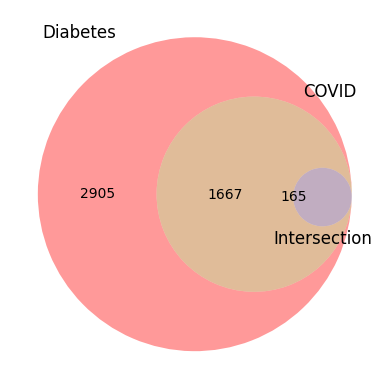

In [10]:
from matplotlib_venn import venn2, venn3
import matplotlib.pyplot as plt

# counts:
total_patients = synthetic_diagnosis_file_df.distinct().count()
diabetes_patients = diabetes_patient_ids.count()
covid_patients = covid_patient_ids.count()
intersection_patients = intersection_patient_ids.count()
union_patients = union_patient_ids.count()

# Calculate the sizes of the sets
diabetes_only = diabetes_patients - intersection_patients
covid_only = covid_patients - intersection_patients

# Draw the Venn diagram
venn3([set(range(diabetes_only)), set(range(covid_only)), set(range(intersection_patients))],
      ('Diabetes', 'COVID', 'Intersection'))

plt.show()


##### 6. Diabetes only a�er COVID Set (30 points)
    a. Now including the date of diagnosis, ﬁnd all patients with Diabetes only after they had COVID by listing their patient IDs.
    b. Find the cardinality of the Diabetes only after COVID set.
    c. Provide a count breakdown for each of the diabetes codes listed above occurring only after COVID.

In [11]:
from pyspark.sql.functions import min
# Find the minimum date for COVID diagnosis for each patient
covid_min_dates = covid_df.groupBy("Patient ID").agg(min("Date").alias("Min_COVID_Date"))

# Join Diabetes patients with the minimum COVID date
diabetes_after_covid_df = diabetes_df.join(covid_min_dates, on="Patient ID", how="inner")

# Filter for Diabetes patients diagnosed after COVID
diabetes_after_covid_df = diabetes_after_covid_df.filter(col("Date") > col("Min_COVID_Date"))
diabetes_after_covid_df.select("Patient ID").show(diabetes_after_covid_df.count())


+----------+
|Patient ID|
+----------+
|   2465811|
|   7542154|
|   2299370|
|    138575|
|    222248|
|    788972|
|   1441531|
|   2301586|
|   5316149|
|   6523303|
|   7609020|
|   7588327|
|    227866|
|   6142172|
|   3636206|
|   2320798|
|   2369658|
|   7181285|
|   6615827|
|   4852233|
|    663704|
|   6471767|
|   7231631|
|   5931449|
|    620623|
|    482256|
|   4056916|
|    175474|
|   7373904|
|   1811725|
|   1346682|
|   5744768|
|    734644|
|   5595625|
|   2986113|
|   3651321|
|   5159103|
|   5855408|
|   2483513|
|   1856152|
|   5637379|
|   4595704|
|   3459970|
|   5055782|
|   5588458|
|    628441|
|   3428304|
|   3091854|
|   1781822|
|   1603639|
|   6450265|
|   6029907|
|   7635276|
|   4927942|
|   6399983|
|   2481330|
|   7631360|
|   2356742|
|   5019777|
|   2629565|
|   6028000|
|   1165591|
|   1610879|
|   4406239|
|   5878004|
|   4859240|
|   2646629|
|   4908235|
|    626112|
|   4322839|
+----------+



In [12]:
# Find the cardinality of the Diabetes only after COVID set
cardinality = diabetes_after_covid_df.select("Patient ID").distinct().count()
print(f"Cardinality of the Diabetes only after COVID set: {cardinality}")


Cardinality of the Diabetes only after COVID set: 70


In [13]:
# Provide a count breakdown for each Diabetes code occurring only after COVID
diabetes_after_covid_counts = diabetes_after_covid_df.groupBy("Diagnosis Code").count()
diabetes_after_covid_counts.show()


+--------------+-----+
|Diagnosis Code|count|
+--------------+-----+
|           E10|   16|
|           E08|   13|
|           E13|   16|
|           E09|    8|
|           E11|   17|
+--------------+-----+

